# EDA of Prospect Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/prospect-data/company_data_filter/Working All Data Latest 1 - ApolloProspects.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       19559 non-null  object
 1   Domain        19863 non-null  object
 2   Name          19863 non-null  object
 3   Job Title     19863 non-null  object
 4   Location      19396 non-null  object
 5   Keywords      19288 non-null  object
 6   LinkedIn URL  15344 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB
None
              Company              Domain                Name  \
0  1019 Senior Living  1019healthcare.com   Heather K\n------   
1  1019 Senior Living  1019healthcare.com         Mari Adkins   
2                 NaN       1carekids.com    Rhonda W\n------   
3          1Care Kids       1carekids.com  Courtney K\n------   
4           1+1 Cares     1plus1cares.com   Melissa A\n------   

                         Job Title              Location  \
0          Chief E

In [4]:
print("Total rows:", len(df))
print("Unique companies:", df['Company'].nunique())
print("Unique job titles:", df['Job Title'].nunique())
print("Unique locations:", df['Location'].nunique())
print("LinkedIn profiles present:", df['LinkedIn URL'].notna().sum())


Total rows: 19863
Unique companies: 4367
Unique job titles: 7455
Unique locations: 3970
LinkedIn profiles present: 15344


# Most Common Job Titles

In [5]:
print(df['Job Title'].value_counts().head(10))

Job Title
Owner                      1179
Director                    570
Chief Executive Officer     457
Executive Director          402
President                   401
Clinical Director           282
CEO                         269
Founder                     260
Director of Operations      244
Business Owner              232
Name: count, dtype: int64


# Most Common Locations

In [6]:
print(df['Location'].value_counts().head(10))

Location
United States                 728
New York, New York            608
Chicago, Illinois             381
Dallas, Texas                 311
Boston, Massachusetts         265
San Francisco, California     253
Los Angeles, California       252
Atlanta, Georgia              236
Houston, Texas                220
Philadelphia, Pennsylvania    212
Name: count, dtype: int64


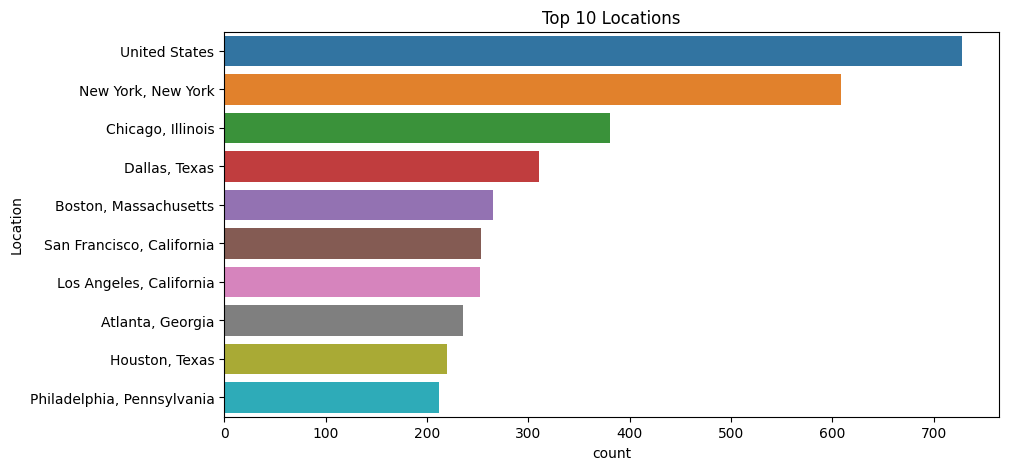

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Location'].notna()], y='Location', order=df['Location'].value_counts().head(10).index)
plt.title("Top 10 Locations")
plt.show()


# Top Companies

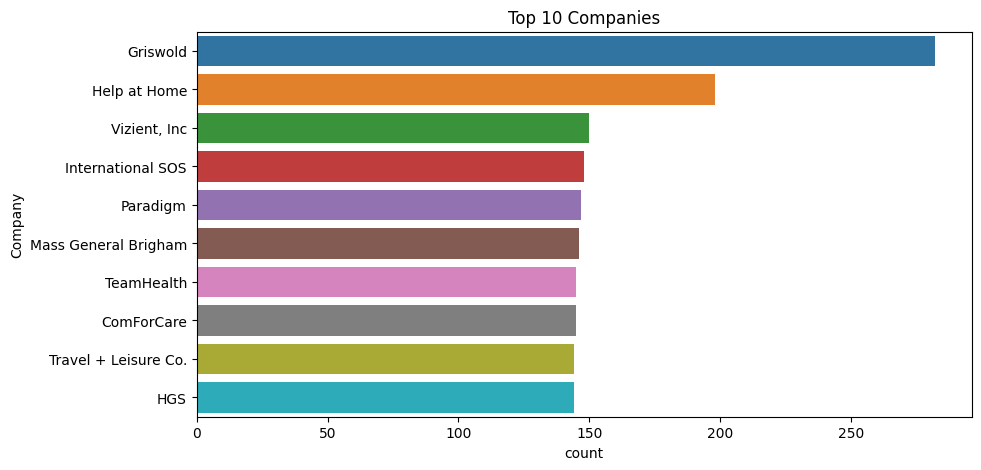

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Company'].notna()], y='Company', order=df['Company'].value_counts().head(10).index)
plt.title("Top 10 Companies")
plt.show()

# LinkedIn URL Analysis

In [9]:
print(df['LinkedIn URL'].notna().value_counts(normalize=True))


LinkedIn URL
True     0.772492
False    0.227508
Name: proportion, dtype: float64


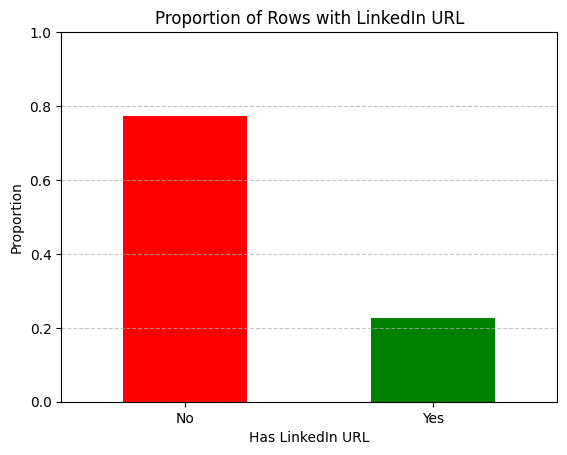

In [10]:
# Get normalized value counts (proportions)
value_counts = df['LinkedIn URL'].notna().value_counts(normalize=True)

# Plot as bar chart
value_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Proportion of Rows with LinkedIn URL')
plt.xlabel('Has LinkedIn URL')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
print(df['Name'].str.split().str[0].value_counts().head(10))


Name
Michael     251
David       241
Jennifer    206
John        195
Lisa        120
Mark        118
Brian       108
Michelle    105
James       104
Chris       102
Name: count, dtype: int64


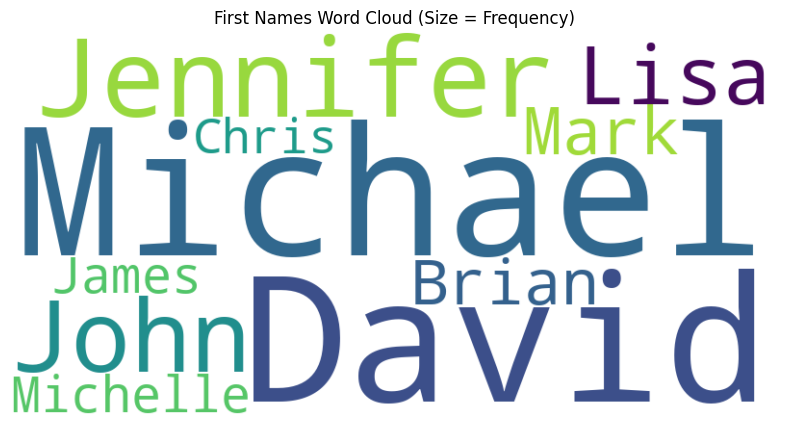

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get frequency counts for all first names (or top 10)
name_counts = df['Name'].str.split().str[0].value_counts().head(10)

# Convert to dictionary for wordcloud
name_freq_dict = name_counts.to_dict()

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(name_freq_dict)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('First Names Word Cloud (Size = Frequency)')
plt.show()


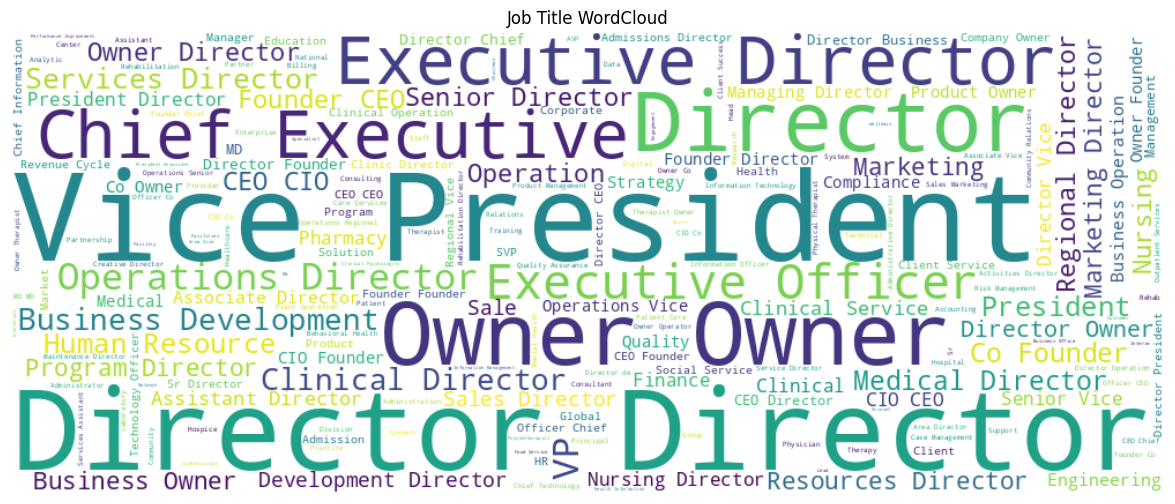

In [13]:
text = " ".join(df['Job Title'].dropna())
wc = WordCloud(width=1000, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Job Title WordCloud")
plt.show()


In [14]:
duplicates = df[df.duplicated(keep=False)]
print(f"🔍 Found {len(duplicates)} duplicate rows:")
print(duplicates)


🔍 Found 1697 duplicate rows:
                    Company                 Domain              Name  \
776    NorthStar Anesthesia      asconsultants.com        Phil Tufts   
777    NorthStar Anesthesia      asconsultants.com        Phil Tufts   
1069    Atria Senior Living  atriaseniorliving.com     Deanna Deriso   
1070    Atria Senior Living  atriaseniorliving.com     Deanna Deriso   
1071    Atria Senior Living  atriaseniorliving.com     Denese Brooks   
...                     ...                    ...               ...   
19738             CarelonRx            zipdrug.com    Jeff W\n------   
19835             CarelonRx            zipdrug.com  Stephanie Taylor   
19836             CarelonRx            zipdrug.com  Stephanie Taylor   
19837             CarelonRx            zipdrug.com     Steven Farnen   
19838             CarelonRx            zipdrug.com     Steven Farnen   

                                               Job Title  \
776    Vice President of Software & Database D

# Removing Duplicates ✅ 

In [15]:
df = df.drop_duplicates()

In [16]:
len(df)

18983

In [17]:
import pandas as pd

# Count missing (NaN or empty string) values per column
null_counts = df.isnull().sum().sort_values(ascending=False)

# Display as a DataFrame
null_df = pd.DataFrame({
    "Missing (NaN)": null_counts,
})

# Show the result
print("🔍 Null Counts Per Column:\n")
display(null_df)


🔍 Null Counts Per Column:



,Missing (NaN)
LinkedIn URL,4342
Keywords,550
Location,442
Company,280
Domain,0
Name,0
Job Title,0


In [18]:
df.head(5)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
0,1019 Senior Living,1019healthcare.com,Heather K\n------,Chief Executive Officer,"Greenfield, Indiana",Hospital & Health Care,NaN
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
2,NaN,1carekids.com,Rhonda W\n------,VP of Pediatrics,NaN,NaN,NaN
3,1Care Kids,1carekids.com,Courtney K\n------,Director of Community Relations,"Las Vegas, Nevada",Hospital & Health Care,NaN
4,1+1 Cares,1plus1cares.com,Melissa A\n------,Director Of Operations,"San Jose, California",Hospital & Health Care,NaN


# Dataset Cleaning

## Removing unwanted names (if People related to same Company > 1)✅ 

In [20]:
import re

def is_valid_name(name):
    if pd.isnull(name):
        return False
    name = name.strip()
    # Check minimum length
    if len(name) < 3:
        return False
    # Check if name contains only letters and spaces
    if not re.match(r'^[A-Za-z\s]+$', name):
        return False
    # Check if name has at least two words
    if len(name.split()) < 2:
        return False
    return True

# Apply filter
# df_valid = df[df['Name'].apply(is_valid_name)].copy()

# Function to apply the conditional filtering per group
def filter_names(group):
    if len(group) > 1:
        # For domains with more than one person, keep only valid names
        valid_mask = group['Name'].apply(is_valid_name)
        return group[valid_mask]
    else:
        # For single-person domains, keep all names
        return group
        
# Apply the filtering group-wise
df_valid = df.groupby('Domain', group_keys=False).apply(filter_names)
# df_valid = df[valid_mask].copy()

# Store rejected names (invalid names)
df_rejected = df.loc[~df.index.isin(df_valid.index)]

print(f'Total Instances: {len(df)}')
print(f'Cleaned Data Instances: {len(df_valid)}')
print(f"Removed {len(df) - len(df_valid)} instances with improper names.")

Total Instances: 18983
Cleaned Data Instances: 14819
Removed 4164 instances with improper names.


/tmp/ipykernel_36/3652996759.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df.groupby('Domain', group_keys=False).apply(filter_names)


In [21]:
df_rejected['Name']

0         Heather K\n------
2          Rhonda W\n------
3        Courtney K\n------
4         Melissa A\n------
5          Trisha C\n------
                ...        
19839        Todd P\n------
19840        Adam S\n------
19843      Trevor S\n------
19861       Blair M\n------
19862     Michael L\n------
Name: Name, Length: 4164, dtype: object

In [22]:
df.head(5)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
0,1019 Senior Living,1019healthcare.com,Heather K\n------,Chief Executive Officer,"Greenfield, Indiana",Hospital & Health Care,NaN
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
2,NaN,1carekids.com,Rhonda W\n------,VP of Pediatrics,NaN,NaN,NaN
3,1Care Kids,1carekids.com,Courtney K\n------,Director of Community Relations,"Las Vegas, Nevada",Hospital & Health Care,NaN
4,1+1 Cares,1plus1cares.com,Melissa A\n------,Director Of Operations,"San Jose, California",Hospital & Health Care,NaN


In [23]:
df_valid.head(100)

,Company,Domain,Name,Job Title,Location,Keywords,LinkedIn URL
1,1019 Senior Living,1019healthcare.com,Mari Adkins,Executive Director,-,Hospital & Health Care,http://www.linkedin.com/in/mari-adkins-7b1164336
6,1st Aid Home Healthcare,1staidhomehealthcare.com,Tahir Khan,President,"Tulsa, Oklahoma",Hospital & Health Care,http://www.linkedin.com/in/tahir-khan-0b157175
7,1st Call Practice Solutions,1stcallsolutions.com,Cayce Branyon,Company Owner,"Belton, South Carolina",Hospital & Health Care\n+1,http://www.linkedin.com/in/caycebranyon
11,"21st Century Management Services, Inc. dba 21s...",21stcenturyhomecare.com,Judith Joseph,President,"Boston, Massachusetts",Hospital & Health Care,http://www.linkedin.com/in/judith-joseph-12893...
12,24/7 On Site Drug and Alcohol Testing,247onsite.net,Steven Heuel,Vice President,"Corpus Christi, Texas",Hospital & Health Care,http://www.linkedin.com/in/steven-heuel-12695ab1
...,...,...,...,...,...,...,...
130,Access Mental Health of Seaside Healthcare,accessmha.com,Wakisha Harvey,Clinical Director,"Atlanta, Georgia",Mental Health Care,http://www.linkedin.com/in/wakisha-harvey-61b5...
132,Access Mental Health of Seaside Healthcare,accessmha.com,Tiffany Jackson,Managing Director,"Atlanta, Georgia",Mental Health Care,http://www.linkedin.com/in/tjacksonaccess
136,Colorado River Medical Center,accesspoint.health,Ron Chieffo,CIO,"Lake Havasu City, Arizona",Hospital & Health Care,http://www.linkedin.com/in/ron-chieffo-3a0a587
137,Lifepoint Health®,accesspoint.health,Jason Fugleberg,Chief Executive Officer,"Pulaski, Tennessee",Hospital & Health Care\n+2,http://www.linkedin.com/in/jason-fugleberg-66b...


## Removing People from Sales ✅ 

In [24]:
print(f"Instances with Job Title Related to Sales: {df_valid['Job Title'].str.contains('sales', case=False, na=False).sum()}")
# df_valid['Job Title'].str.contains('sales', case=False, na=False)

Instances with Job Title Related to Sales: 413


In [25]:
print(f"Instances before filtering: {len(df_valid)}")

Instances before filtering: 14819


In [26]:
import pandas as pd

# Filter out rows where 'Job Title' contains 'sales' (case-insensitive)
df_valid = df_valid[~df_valid['Job Title'].str.contains('sales', case=False, na=False)].copy()

print(f"Instances after filtering out sales: {len(df_valid)}")

# Optionally, overwrite original DataFrame or save to CSV
# df = df_filtered
# df.to_csv('your_file_filtered.csv', index=False)


Instances after filtering out sales: 14406


## Assigning Rank-wise Status ✅ 

In [27]:
import pandas as pd

# Step 1: Define rank map
rank_map = {
    'chief executive officer': 1,
    'ceo': 1,
    'cio': 1,
    'chief information officer': 1,
    'owner': 1,
    'founder': 1,
    'chairman': 1,
    'president': 2,
    'cto': 2,
    'chief technology officer': 2,
    'cso': 2,
    'chief security officer': 2,
    'coo': 2,
    'chief operating officer': 2,
    'cmo': 2,
    'chief medical officer': 2,
    'executive director': 3,
    'director of clinical department': 3,
    'director business development': 3,
    'director': 4,
}

# Step 2: Assign ranks from job titles
def assign_rank(title):
    if pd.isna(title):
        return 999
    title = title.lower()
    parts = re.split(r'[/,&\-]+|\band\b|,', title)
    title = [p.strip() for p in parts if p.strip()]
    # print(title)
    matched_ranks = [
        rank for keyword, rank in rank_map.items() if keyword in title
    ]
    # print(matched_ranks)
    return min(matched_ranks) if matched_ranks else 999

df_valid['Rank'] = df_valid['Job Title'].apply(assign_rank)

# Step 3: Mark top 3 or all based on domain size
def mark_status(group):
    group = group.copy()
    if len(group) <= 5:
        group['Status'] = 'Yes'
    else:
        group = group.sort_values(by='Rank', ascending=True)
        group['Status'] = ['Yes' if i < 5 else 'No' for i in range(len(group))]
    return group

df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)

# Step 4: Final sort and save
df_valid = df_valid.sort_values(by='Domain')


columns_to_keep = [
    'Company',
    'Name',
    'Job Title',
    'Status'
]

df_final = df_valid[columns_to_keep].copy()
df_final = df_final.reset_index(drop=True)
df_final['Unique ID'] = df_final.index
df_final.to_csv('filtered_top5_by_domain.csv', index=False)
df_final.to_excel('filtered_top5_by_domain.xlsx', index=False)

print("✅ Done. File saved as 'filtered_top5_by_domain.csv'")


/tmp/ipykernel_36/2793081387.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)


✅ Done. File saved as 'filtered_top5_by_domain.csv'


In [128]:
df_valid = pd.read_csv('/kaggle/working/filtered_top5_by_domain.csv')

## Checking Correctness of Program

In [28]:
yes_counts = df_valid[df_valid['Status'] == 'Yes'].groupby('Domain').size().reset_index(name='Yes_Count')
print(len(yes_counts[yes_counts['Yes_Count'] > 5]))


0


In [29]:
# Count total people per domain
domain_counts = df_valid.groupby('Domain').size().reset_index(name='Total')

# Count 'Yes' per domain
yes_counts = df_valid[df_valid['Status'] == 'Yes'].groupby('Domain').size().reset_index(name='Yes_Count')

# Merge both
merged = pd.merge(domain_counts, yes_counts, on='Domain', how='left').fillna(0)

# Convert Yes_Count to int
merged['Yes_Count'] = merged['Yes_Count'].astype(int)

# Find domains with > 3 total people but more than 3 marked as 'Yes'
violations = merged[(merged['Total'] > 5) & (merged['Yes_Count'] > 5)]

print(f"Domains with more than 5 retained: {len(violations)}")

Domains with more than 5 retained: 0


In [30]:
print(f'Original Instances Count: {len(df)}')
print(f'Filtered Instances Count: {len(df_valid)}')

Original Instances Count: 18983
Filtered Instances Count: 14406


In [31]:
import os
import glob

files = glob.glob('/kaggle/working/*')
for f in files:
    os.remove(f)

In [32]:
# filter_prospect.py

import re
import pandas as pd

def is_valid_name(name):
    if pd.isnull(name):
        return False
    name = name.strip()
    # Check minimum length
    if len(name) < 3:
        return False
    # Check if name contains only letters and spaces
    if not re.match(r'^[A-Za-z\s]+$', name):
        return False
    # Check if name has at least two words
    if len(name.split()) < 2:
        return False
    return True

def filter_names(group):
    if len(group) > 1:
        # For domains with more than one person, keep only valid names
        valid_mask = group['Name'].apply(is_valid_name)
        return group[valid_mask]
    else:
        # For single-person domains, keep all names
        return group

# Step 1: Load your data here
df = pd.read_csv('/kaggle/input/prospect-data/company_data_filter/Working All Data Latest 1 - ApolloProspects.csv')  # <-- Update this path accordingly
print(f'Total Instances: {len(df)}')

# Step 2: REmove Duplicates
df = df.drop_duplicates()
print(f'Total Instances(after removing duplicate ): {len(df)}')

# Step 3: Apply name filtering conditionally by Domain
df_valid = df.groupby('Domain', group_keys=False).apply(filter_names)

print(f'Cleaned Data Instances: {len(df_valid)}')
print(f"Removed {len(df) - len(df_valid)} instances with improper names.")

# Step 4: Filter out rows where 'Job Title' contains 'sales' (case-insensitive)
df_valid = df_valid[~df_valid['Job Title'].str.contains('sales', case=False, na=False)].copy()

print(f"Instances after filtering out sales: {len(df_valid)}")

# Step 5: Define rank map for job titles
rank_map = {
    'chief executive officer': 1,
    'ceo': 1,
    'cio': 1,
    'chief information officer': 1,
    'owner': 1,
    'founder': 1,
    'chairman': 1,
    'president': 2,
    'cto': 2,
    'chief technology officer': 2,
    'cso': 2,
    'chief security officer': 2,
    'coo': 2,
    'chief operating officer': 2,
    'cmo': 2,
    'chief medical officer': 2,
    'executive director': 3,
    'director of clinical department': 3,
    'director business development': 3,
    'director': 4,
}

def assign_rank(title):
    if pd.isna(title):
        return 999
    title = title.lower()
    parts = re.split(r'[/,&\-]+|\band\b|,', title)
    title_parts = [p.strip() for p in parts if p.strip()]
    matched_ranks = [
        rank for keyword, rank in rank_map.items() if keyword in title_parts
    ]
    return min(matched_ranks) if matched_ranks else 999

# Step 6: Assign ranks
df_valid['Rank'] = df_valid['Job Title'].apply(assign_rank)

def mark_status(group):
    group = group.copy()
    if len(group) <= 5:
        group['Status'] = 'Yes'
    else:
        group = group.sort_values(by='Rank', ascending=True)
        group['Status'] = ['Yes' if i < 5 else 'No' for i in range(len(group))]
    return group

# Step 7: Mark top 5 by rank within each Domain
df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)

# Step 8: Final sorting and saving results
df_valid = df_valid.sort_values(by='Domain')

df_final = df_valid.copy()

# df_final = df_final.reset_index(drop=True)
# df_final['Unique ID'] = df_final.index

# columns_to_keep = [
#     'Unique ID',
#     'Company',
#     'Name',
#     'Job Title',
#     'Status'
# ]

# df_final = df_final[columns_to_keep].copy()


# Save to CSV and Excel
df_final.to_csv('filtered_top5_by_domain.csv', index=False)
df_final.to_excel('filtered_top5_by_domain.xlsx', index=False)
print(f'Orignal Instance Count: {len(df)}')
print(f'Orignal Instance Count: {len(df_valid)}')
print("✅ Done. File saved as 'filtered_top5_by_domain.csv' and 'filtered_top5_by_domain.xlsx'")


Total Instances: 19863
Total Instances(after removing duplicate ): 18983


/tmp/ipykernel_36/19370128.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df.groupby('Domain', group_keys=False).apply(filter_names)


Cleaned Data Instances: 14819
Removed 4164 instances with improper names.
Instances after filtering out sales: 14406


/tmp/ipykernel_36/19370128.py:97: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid = df_valid.groupby('Domain', group_keys=False).apply(mark_status)


Orignal Instance Count: 18983
Orignal Instance Count: 14406
✅ Done. File saved as 'filtered_top5_by_domain.csv' and 'filtered_top5_by_domain.xlsx'


In [33]:
# Count total people per domain
domain_counts = df_valid.groupby('Domain').size().reset_index(name='Total')

# Count 'Yes' per domain
yes_counts = df_valid[df_valid['Status'] == 'Yes'].groupby('Domain').size().reset_index(name='Yes_Count')

# Merge both
merged = pd.merge(domain_counts, yes_counts, on='Domain', how='left').fillna(0)

# Convert Yes_Count to int
merged['Yes_Count'] = merged['Yes_Count'].astype(int)

# Find domains with > 3 total people but more than 3 marked as 'Yes'
violations = merged[(merged['Total'] > 5) & (merged['Yes_Count'] > 5)]

print(f"Domains with more than 5 retained: {len(violations)}")

Domains with more than 5 retained: 0
